# Blackbody Radiation

## Ver instructions en https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

### Lista de archivos

In [3]:
!ls

EX-5529A_Blackbody_Radiation.pdf  Plot_Data.ipynb		   README.md
libro2.xlsx			  Plot_Data_PASCO_Blackbody.ipynb


In [4]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Imprime estructura del archivo

In [6]:
from openpyxl import load_workbook
workbook = load_workbook(filename="libro2.xlsx")
print(workbook.sheetnames)

['libro2']


### Imprime columnas

In [7]:
sheet = workbook['libro2']
n = 0
for col in sheet.iter_cols(values_only=True):
  #print("Column = ",col)
  n += 1
  print("\n\n",n,col)



 1 ('Set', 'Table Angle (Â°)', 100, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

### Grafica Lambda (nm) vs Index of Refraction

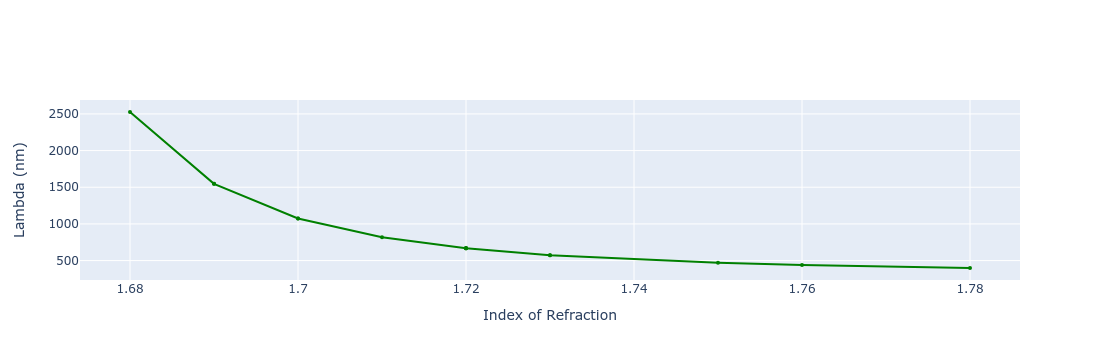

In [8]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 4: X = col
  elif n == 8: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Index of Refraction",yaxis_title="Lambda (nm)")
fig.show()

### Grafica Tcal (K) vs rho

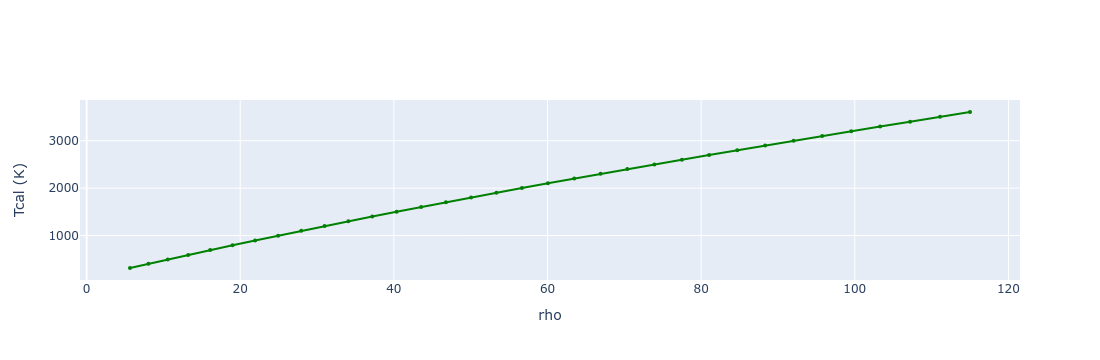

In [9]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 9: X = col
  elif n == 11: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="rho",yaxis_title="Tcal (K)")
fig.show()

### Grafica Relative Intensity (%) vs Angle (rad) usando la columna 14

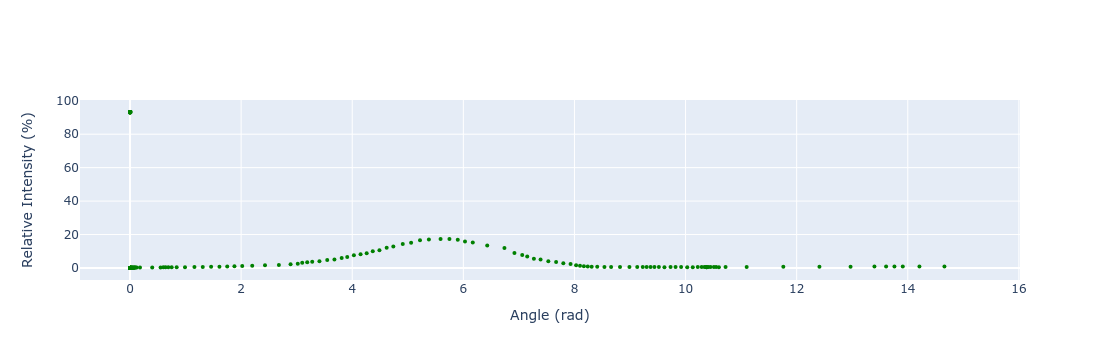

In [12]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 14: X = col
  elif n == 15: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Angle (rad)",yaxis_title="Relative Intensity (%)")
fig.show()

### Grafica Relative Intensity (%) vs Angle (rad) pero filtrando los datos para quitar valores espurios

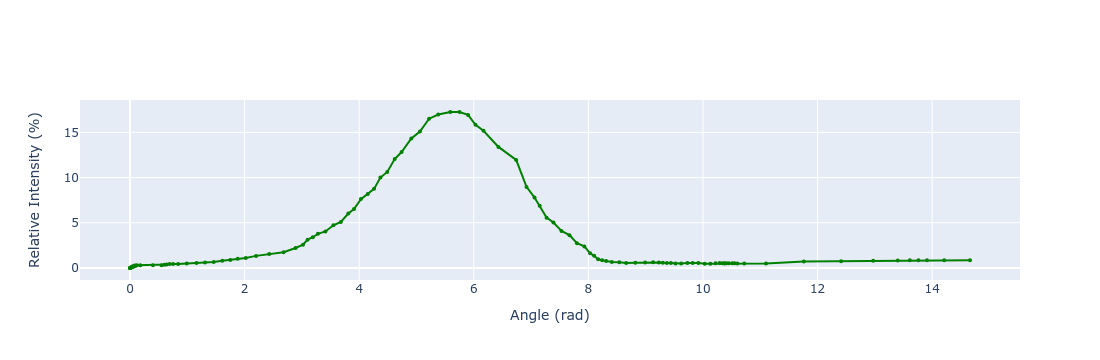

In [17]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) <20 and float(Y[j]) <30 and float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Angle (rad)",yaxis_title="Relative Intensity (%)")
fig.show()

### Convertimos a True Angle (degrees) usando la fórmula siguiente:

### true angle‎=abs([angle (°)‎])/(AngleCal/100)

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

### In this calculation, AngleCal/100 = (angle of Rotary Motion Sensor in degrees)/(angle of the table in degrees) and should have a value of about 60.

### Graficando Relative Intensity (%) vs True Angle (degrees) del archivo xlsx usando la columna 20

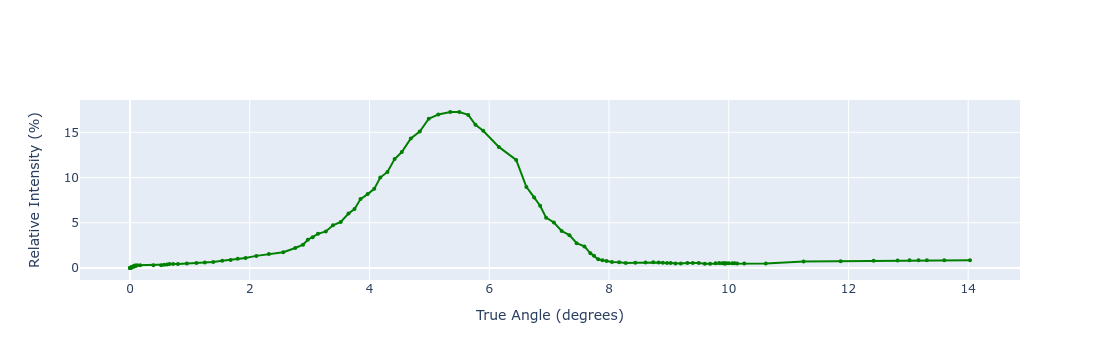

In [26]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np

n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 20: X = col
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) <20 and float(Y[j]) <30 and float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="True Angle (degrees)",yaxis_title="Relative Intensity (%)")
fig.show()

### Usamos la ecuación:

### CorrTrueAng‎=[Initial angle]-[true angle]

### con Initial angle] = 68.9

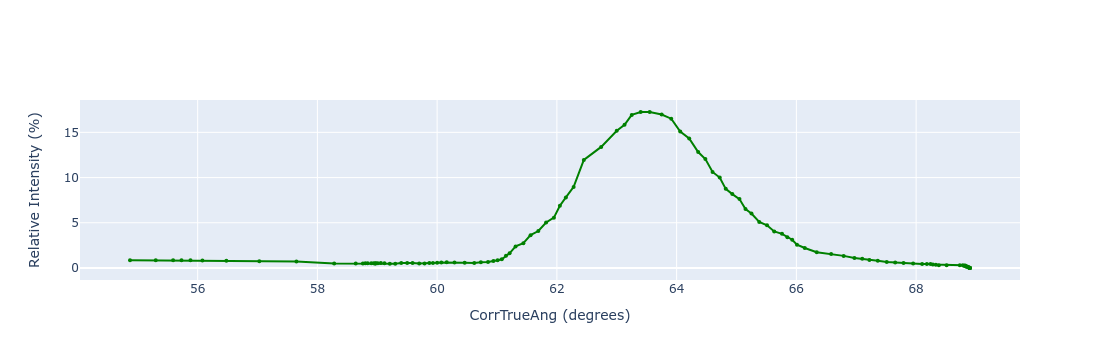

In [28]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
CorrTrueAng = [ 68.9 - i for i in  X_filtered]

fig = go.Figure(data=go.Scatter(x=CorrTrueAng, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="CorrTrueAng (degrees)",yaxis_title="Relative Intensity (%)")
fig.show()

### Obtenemos el Index of Refraction usando la ecuación

### n‎=sqrt((2*sin([CorrTrueAng (°)‎])/sqrt(3)+0.5)^2+3/4)

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf¶

### Graficamos la Intensidad Relativa vs Longitud de Onda (nm) usando la columna 23

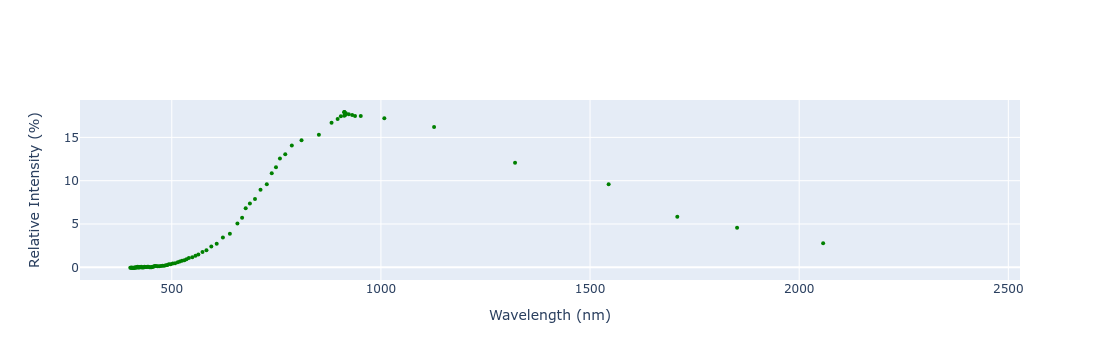

In [85]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
n = 0
for col in sheet.iter_cols(values_only=True):
  n += 1
  if n == 38: X = col
  elif n == 30: Y = col
fig = go.Figure(data=go.Scatter(x=X, y=Y, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Relative Intensity (%)")
fig.show()

### Graficamos la Intensidad Relativa vs Longitud de Onda (nm) de 400-2500 nm usando la columna 23 pero filtrando los datos para quitar valores espurios

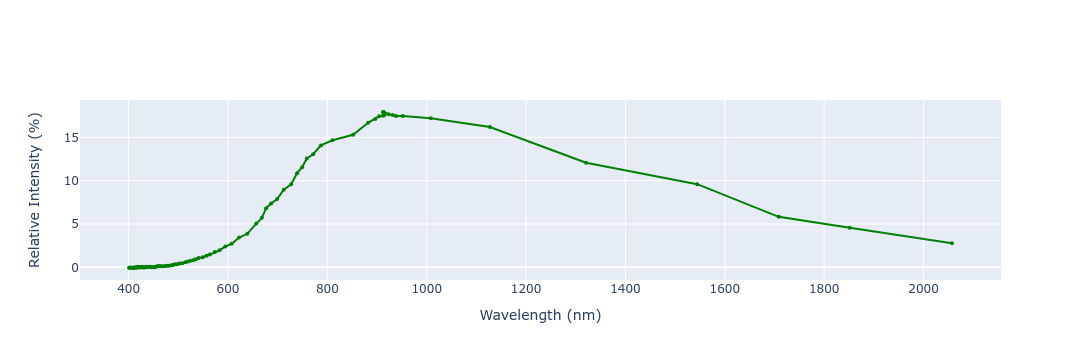

In [86]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np
j =1
old = 0
X_filtered=[]
Y_filtered=[]
for i in X:
  if j < len(X)-1:
    j+=1
    if (X[j] is not None and Y[j] is not None):
      if (float(X[j]) != old ):
        old = float(X[j])
        X_filtered.append(float(X[j]))
        Y_filtered.append(float(Y[j]))
fig = go.Figure(data=go.Scatter(x=X_filtered, y=Y_filtered, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Relative Intensity (%)")
fig.show()

### Comparamos con la curva teórica dada por

### I‎=([C1]/([λ (nm)‎]/10^9)^5) (1/(exp([C2]/(([λ (nm)]/10^9)*[Temp])-1)))

### Tomada de https://cdn.pasco.com/lab_experiment/l_1266/EX-5529A_Blackbody_Radiation.pdf

### con C1‎=2*π*[Planck's constant (J·s)‎]*[Speed of light (m/s)‎]^2

### C2‎=[Planck's constant (J·s)‎]*[Speed of light (m/s)‎]/[Boltzmann's constant (J/K)‎]

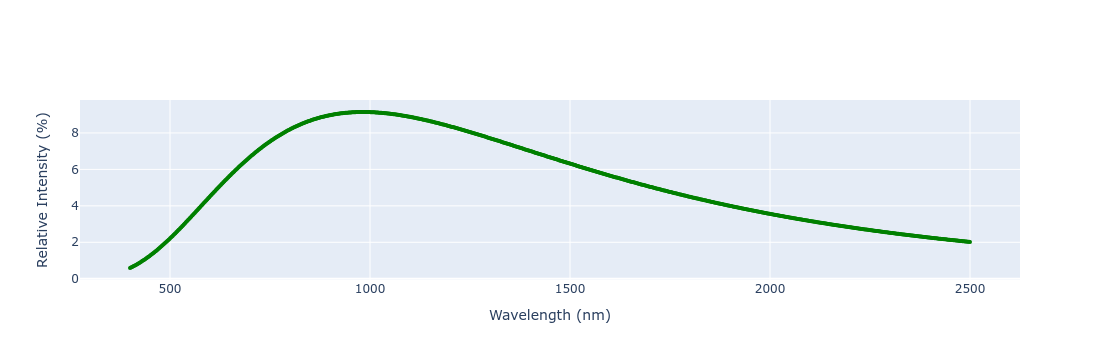

In [90]:
import math
import scipy

lambdas = np.linspace(400, 2500, 1000).tolist()
Temp = 2950
h = scipy.constants.h
c = scipy.constants.c
k = scipy.constants.k

scala = 10**11
I =[(2*h*c**2/(long_onda/10**9)**5) / (math.exp(h*c/(long_onda/10**9)/k/Temp)-1)/scala for long_onda in lambdas]
fig = go.Figure(data=go.Scatter(x=lambdas, y=I, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Relative Intensity (%)")
fig.show()
